# Multiple Linear Regression
## Bike-Sharing

#### Problem Statement:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



## Full Disclosure
I have used the sample notebook from the MLR course material. I will modify it according to the needs of this assignment. This way i would not have to retype the code

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [62]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [63]:
import numpy as np
import pandas as pd

In [64]:
bike = pd.read_csv("day.csv")

In [65]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the housing dataframe

In [66]:
bike.shape

(730, 16)

In [67]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [68]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Note:
Looks like cnt is the target variable. It must ideally be the sum of casual and registered, but it is not always the case. In this case casual and registered may be very valuable for prediction, but i feel that would actually be data leakage. To err on the side of caution, I will drop these columns, along with a few other redundant columns

In [69]:
bike.drop(['casual', 'registered', 'dteday', 'instant'], axis = 1, inplace = True)

## Step 2: Visualising the Data


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

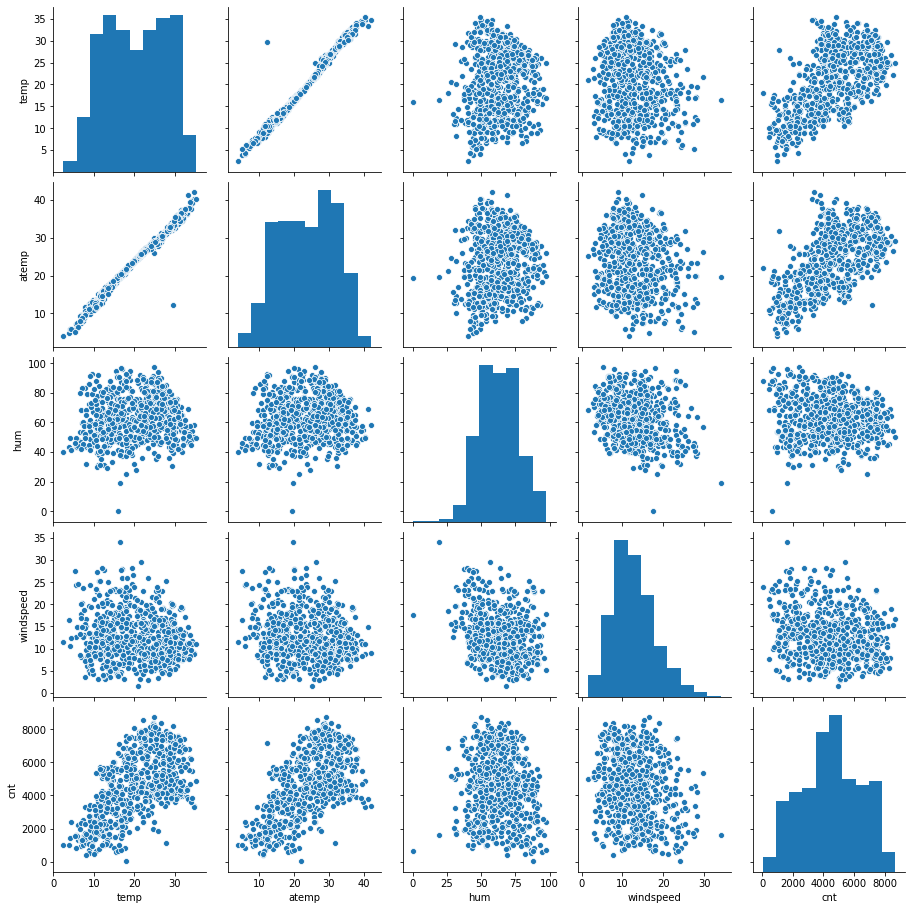

In [71]:
sns.pairplot(bike[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.show()

cnt is positively correlated with temp and atemp. With hum and windspeed, we dont see much correlation. Probably there is some non-linear relationship here, which Linear Regression may not be able to resolve

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

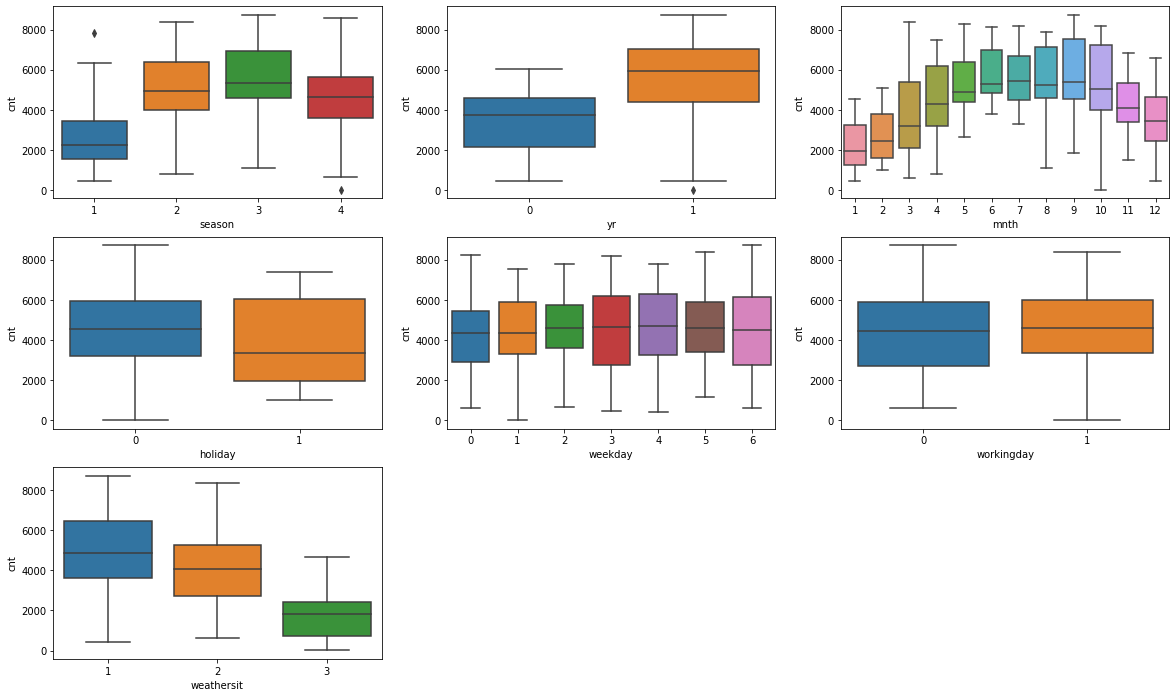

In [72]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.show()

Looks like weekday and working day have no significant impact on cnt, at least going by the median. Other categorical variables have some impact. mnth and season variables show that there is significant demand in the summer and fall seasons

## Step 3: Data Preparation

In the assignment it was recommended that we map season and weathersit to their respective string values and then transform them using get_dummies. While I agree, that we must apply this for weathersit, I dont think we must apply this for season. This is because the season values are ordered: 1:spring, 2:summer, 3:fall, 4:winter. These seasons occur one after the other, therefore I believe we must leave this field as it is. Whereas, weathersit has no order as such and thus we must map it to its string values, for better interpretability

In [73]:
# Defining the map function
bike['weathersit'] = bike['weathersit'].astype(int)
def mapper(x):
    if x == 1:
        return 'clear'
    if x == 2:
        return 'Misty'
    if x == 3:
        return 'Light Snow'
    if x == 4:
        return 'Heavy Rain'

# Applying the function to the housing list
bike['weathersit'] = bike['weathersit'].apply(mapper)

In [74]:
# Check the housing dataframe now

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600


### Dummy Variables

We will convert weathersit to dummyvariables

In [75]:
weather_status = pd.get_dummies(bike['weathersit'], drop_first = True)

In [76]:
weather_status.head()

,Misty,clear
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


- `00` will correspond to `Light Snow`
- `01` will correspond to `clear`
- `10` will correspond to `Misty`

In [77]:
bike = pd.concat([bike, weather_status], axis = 1)

In [78]:
# Now let's see the head of our dataframe.

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Misty,clear
0,1,0,1,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,985,1,0
1,1,0,1,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,801,1,0
2,1,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349,0,1
3,1,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562,0,1
4,1,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600,0,1


In [79]:
# Drop 'weathersit' as we have created the dummies for it

bike.drop(['weathersit'], axis = 1, inplace = True)

In [80]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Misty,clear
0,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0
1,1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0
2,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,1
3,1,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,1
4,1,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,1


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [81]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

### MinMax scaling

In [82]:
from sklearn.preprocessing import MinMaxScaler

In [83]:
scaler = MinMaxScaler()

In [84]:
# Apply scaler() to all the columns except the 'categorical' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [85]:
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Misty,clear
653,4,1,10,0,2,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,1
576,3,1,7,0,2,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1
426,1,1,3,0,6,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0
728,1,1,12,0,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1
482,2,1,4,0,6,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0


In [86]:
df_train.describe()

,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Misty,clear
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,2.517647,0.507843,6.549020,0.025490,2.990196,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.343137,0.627451
std,1.111947,0.500429,3.468714,0.157763,2.017093,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.475223,0.483958
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,1.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000,1.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


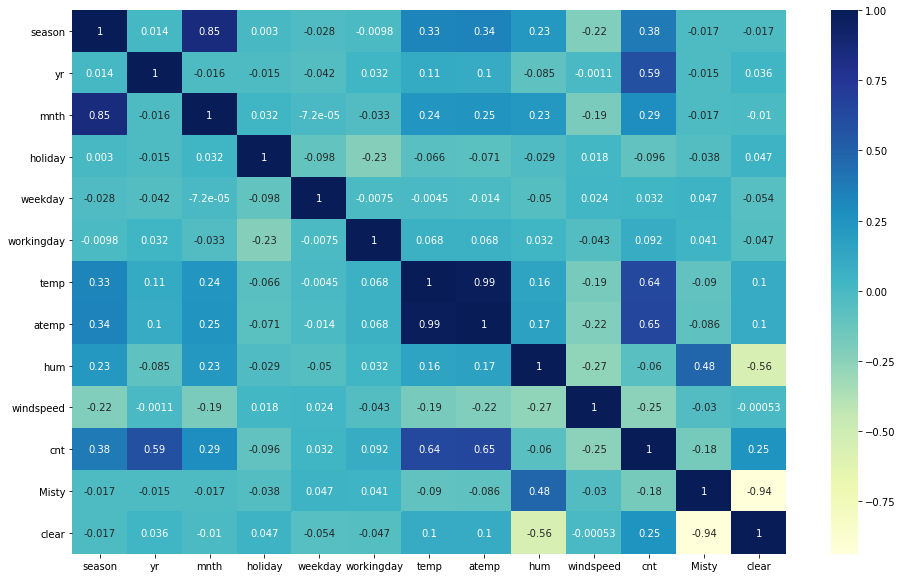

In [87]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As we have already seen, temp and atemp have some good correlation with cnt. Likewise yr also seems to have good correlation, but it is a categorical variable

### Dividing into X and Y sets for the model building

In [88]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model


In [89]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const        -0.124602
season        0.050302
yr            0.232624
mnth         -0.001627
holiday      -0.069836
weekday       0.007825
workingday    0.019331
temp          0.245035
atemp         0.247705
hum          -0.104810
windspeed    -0.147583
Misty         0.195536
clear         0.253556
dtype: float64

In [90]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 31 Aug 2021   Prob (F-statistic):          3.04e-172
Time:                        16:47:43   Log-Likelihood:                 466.16
No. Observations:                 510   AIC:                            -906.3
Df Residuals:                     497   BIC:                            -851.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1246      0.049     -2.540      0.0

Looking at the p-values, it looks like mnth is the least significant. We will supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [91]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,atemp,350.06
6,temp,334.91
0,season,23.74
8,hum,18.71
2,mnth,17.05
11,clear,10.54
10,Misty,7.65
9,windspeed,4.25
5,workingday,3.21
4,weekday,3.14


We generally want a VIF that is less than 5. Clearly atemp needs to be dropped first

### Dropping the variable and updating the model

if we go by p-values, mnth needs to be dropped first. But looking at the VIF atemp needs to be dropped first. We can first drop atemp and then we can revert to dropping mnth. Besides, atemp also has a high p-value of 0.092

In [93]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('atemp', 1,)

In [94]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [95]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     195.5
Date:                Tue, 31 Aug 2021   Prob (F-statistic):          8.74e-173
Time:                        16:47:55   Log-Likelihood:                 464.70
No. Observations:                 510   AIC:                            -905.4
Df Residuals:                     498   BIC:                            -854.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1243      0.049     -2.530      0.0

In [96]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,season,23.72
7,hum,18.48
2,mnth,17.05
10,clear,10.37
6,temp,8.19
9,Misty,7.59
8,windspeed,4.10
5,workingday,3.21
4,weekday,3.13
1,yr,2.07


### Dropping the Variable and Updating the Model

mnth has the highest p-value and it also has very high VIF. We will drop it to see how the VIF changes. I am partial towards season, eventhough it has the highest VIF. This is because, season has only 4 levels and is better for interpretability

In [97]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('mnth', 1)

In [98]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [99]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     215.3
Date:                Tue, 31 Aug 2021   Prob (F-statistic):          7.29e-174
Time:                        16:48:01   Log-Likelihood:                 464.47
No. Observations:                 510   AIC:                            -906.9
Df Residuals:                     499   BIC:                            -860.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1217      0.049     -2.486      0.0

In [100]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,hum,18.38
9,clear,10.37
5,temp,8.12
8,Misty,7.58
0,season,7.17
7,windspeed,4.10
4,workingday,3.21
3,weekday,3.12
1,yr,2.06
2,holiday,1.10


### Dropping the variable and updating the model

As you might have noticed, P-values have stabilized. We just need to work on dropping the variables based on VIF

In [101]:
X = X.drop('hum', 1)

In [102]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [103]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     235.9
Date:                Tue, 31 Aug 2021   Prob (F-statistic):          1.11e-173
Time:                        16:48:12   Log-Likelihood:                 461.21
No. Observations:                 510   AIC:                            -902.4
Df Residuals:                     500   BIC:                            -860.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2112      0.034     -6.191      0.0

In [104]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,clear,8.65
5,temp,7.56
0,season,6.23
7,Misty,5.02
6,windspeed,4.05
4,workingday,3.14
3,weekday,3.10
1,yr,2.06
2,holiday,1.10


Dropping the column clear now

In [105]:
X = X.drop('clear', 1)
# Build a fifth fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     204.5
Date:                Tue, 31 Aug 2021   Prob (F-statistic):          1.81e-152
Time:                        16:48:36   Log-Likelihood:                 408.44
No. Observations:                 510   AIC:                            -798.9
Df Residuals:                     501   BIC:                            -760.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0780      0.023      3.368      0.0

In [106]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp,6.50
0,season,5.74
6,windspeed,3.30
4,workingday,2.95
3,weekday,2.90
1,yr,2.00
7,Misty,1.49
2,holiday,1.07


Dropping 'temp' would be ideal given that it has very high VIF. However, workingday has a very high p-value, whereas temp has a p-value of 0. So I would choose to drop workingday instead

In [107]:
X = X.drop('workingday', 1)
# Build a sixth fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     232.8
Date:                Tue, 31 Aug 2021   Prob (F-statistic):          3.71e-153
Time:                        16:49:02   Log-Likelihood:                 407.24
No. Observations:                 510   AIC:                            -798.5
Df Residuals:                     502   BIC:                            -764.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0894      0.022      4.075      0.0

In [108]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,temp,6.19
0,season,5.65
5,windspeed,3.17
3,weekday,2.88
1,yr,1.99
6,Misty,1.47
2,holiday,1.03


Dropping temp leads to a very low R-squared. So I tried dropping season. This did not lead to too much of a drop in R-squared,
while both the VIF and P-Values remained within bounds

In [113]:
X = X.drop('season', 1)
# Build a seventh fitted model
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     230.3
Date:                Tue, 31 Aug 2021   Prob (F-statistic):          9.02e-141
Time:                        16:55:24   Log-Likelihood:                 375.35
No. Observations:                 510   AIC:                            -736.7
Df Residuals:                     503   BIC:                            -707.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1703      0.021      8.174      0.0

In [114]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,3.69
4,windspeed,3.11
2,weekday,2.82
0,yr,1.98
5,Misty,1.45
1,holiday,1.03


## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [115]:
y_train_cnt = lr_7.predict(X_train_lm)

Text(0.5, 0, 'Errors')

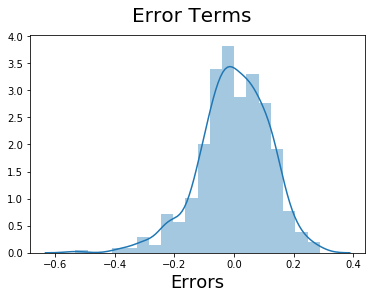

In [116]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. seventh model.

#### Applying the scaling on the test sets

In [117]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [118]:
df_test.describe()

,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Misty,clear
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,2.456621,0.479452,6.474886,0.036530,3.018265,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.319635,0.652968
std,1.109463,0.500722,3.421875,0.188034,1.988415,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.467403,0.477117
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000
25%,1.000000,0.000000,4.000000,0.000000,1.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000
50%,2.000000,0.000000,6.000000,0.000000,3.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,1.000000
75%,3.000000,1.000000,9.000000,0.000000,5.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000


#### Dividing into X_test and y_test

In [119]:
y_test = df_test.pop('cnt')
X_test = df_test

In [120]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [121]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(['atemp', 'mnth', 'hum', 'clear', 'workingday', 'season'], axis = 1)

In [124]:
# Making predictions using the fourth model

y_pred_m4 = lr_7.predict(X_test_m4)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

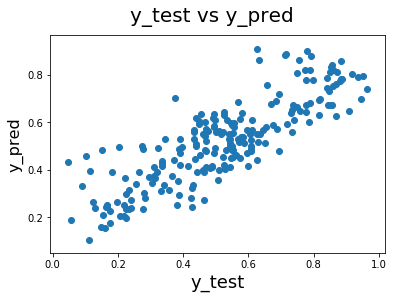

In [125]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      


We can see that the equation of our best fitted line is:

$ cnt = 0.2392  \times  yr - 0.0685  \times  holiday + 0.0069 \times weekday + 0.5397 \times temp - 0.2064 \times windspeed - 0.0604 \times Misty + 0.1703 $


# Significant Variables
To conlude the significant variables for this problem are:

- yr : year (0: 2018, 1:2019)
- holiday : whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- temp : temperature in Celsius
- windspeed: wind speed
- If the weathersit value is 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist' or NOT